Lab | Imbalanced data

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

In [44]:
data= pd.read_csv(r"C:\Users\torra\IH-Labs\lab-imbalanced-data\files_for_lab\customer_churn.csv")

In [45]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


From the original dataset we are going to use the following columns:

In [46]:
data2=data[["tenure","SeniorCitizen","MonthlyCharges","Churn"]]

In [47]:
data2

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


Changes in variable "Churn" (y)

In [48]:
data2["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data2['Churn'] = lb.fit_transform(data2['Churn'])

C:\Users\torra\AppData\Local\Temp\ipykernel_28344\1262052543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Churn'] = lb.fit_transform(data2['Churn'])


We are going to take a closer look to the variables

Tenure

In [50]:
data2["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [51]:
data2["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Text(0, 0.5, 'Frequency')

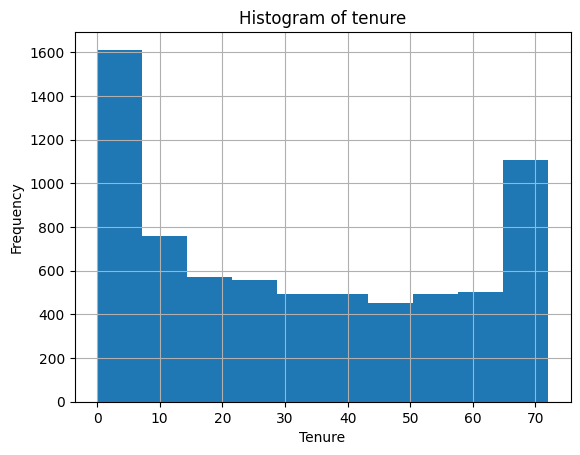

In [52]:
data.tenure.hist()
plt.title('Histogram of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

The variable "Tenure" does not exhibit a normal distribution.

Senior Citizen

In [53]:
data2["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [54]:
data2["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

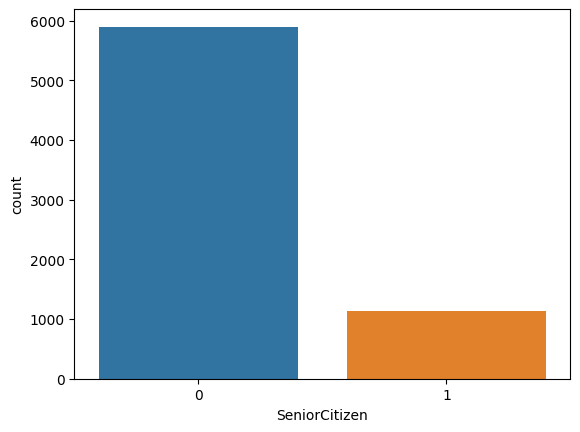

In [55]:
sns.countplot(x="SeniorCitizen", data=data2)
plt.show()

In the variable Senior Citizen the classes are highly imbalanced

Monthly Charges

In [56]:
data2["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [57]:
data2["MonthlyCharges"].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [58]:
data2["MonthlyCharges"].mean()

64.76169246059918

Text(0, 0.5, 'Frequency')

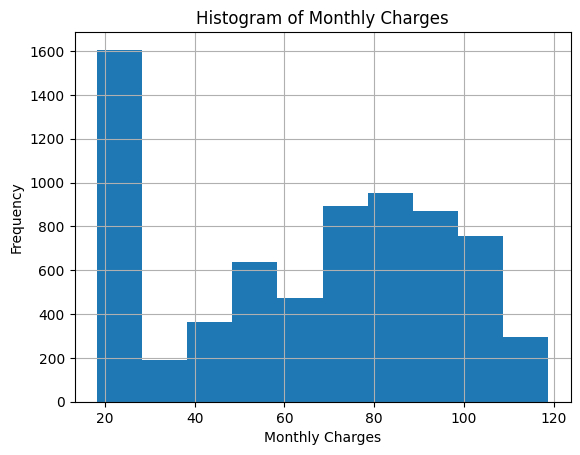

In [59]:
data.MonthlyCharges.hist()
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

The variable "Monthle Charges" does noot exhibit a normal distribution.

We separate X and y

In [60]:
X=data2[["tenure","SeniorCitizen","MonthlyCharges"]]
y=data2[["Churn"]]

Correlation Matrix of X dataframe

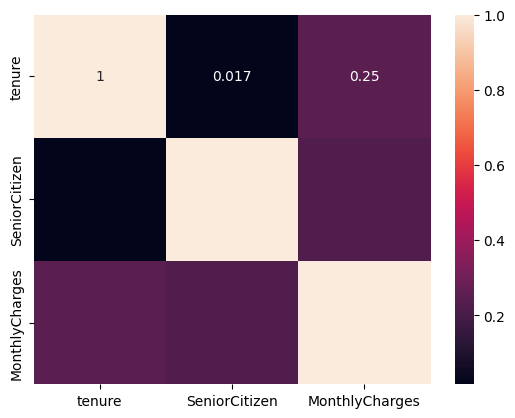

In [61]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


Standarization of features

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [65]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

In [66]:
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [67]:
y_train.head()

,Churn
3296,0
6397,0
6043,1
5309,0
3000,1


In [68]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [69]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
logr = linear_model.LogisticRegression()
logr.fit(X_train_scaled,y_train)

C:\Users\torra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [71]:
logr.predict_proba(X_train_scaled)

array([[0.83053024, 0.16946976],
       [0.8895592 , 0.1104408 ],
       [0.66553972, 0.33446028],
       ...,
       [0.98794371, 0.01205629],
       [0.25880337, 0.74119663],
       [0.7962228 , 0.2037772 ]])

In [72]:
logr.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 1, 0])

In [73]:
logr.score(X_test_scaled, y_test)

0.7808063600227144

In [74]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = logr.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


Synthetic Minority Oversampling TEchnique (SMOTE)

In [75]:
from sklearn.utils import resample

In [76]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
2,-1.196572,-0.435476,-0.819594,1
3,1.168670,-0.435476,-1.483535,0
4,-0.829552,-0.435476,0.658427,1


In [77]:
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [78]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

There is a clear imbalance between churn and no churn.

In [79]:
yes_churn_oversampled = resample(yes_churn, 
                                    replace=True, 
                                    n_samples = len(no_churn),
                                    random_state=0)

In [80]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(20)

(3876, 4)

(3876, 4)

,tenure,SeniorCitizen,MonthlyCharges,Churn
2453,-1.278132,-0.435476,0.156300,1
1976,-1.278132,-0.435476,1.168894,1
4528,-1.196572,-0.435476,-0.319135,1
3011,-1.278132,-0.435476,0.488271,1
2758,-1.155792,-0.435476,-1.460181,1
5202,1.168670,-0.435476,-1.511895,1
3763,-0.666432,2.296336,-0.857962,1
1033,-1.074232,-0.435476,-0.294112,1
2135,-0.340191,-0.435476,1.043780,1
4006,-1.155792,-0.435476,0.301433,1


We have restored balance in the dataframe.

In [81]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
3,1.168670,-0.435476,-1.483535,0
5,1.046330,-0.435476,0.503285,0
6,-0.258631,-0.435476,0.701800,0


In [82]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [86]:
from sklearn.linear_model import LogisticRegression
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))
LR_over.score(X_test_scaled, y_test)

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.5743944636678201


0.7206132879045997

There have been no improvement,on the contrary precison is lower and also the score.